In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score

df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df=df.drop(['Id'],axis=1)

In [52]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
encoder = OneHotEncoder(sparse=False)
target_encoded = encoder.fit_transform(df[['Species']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [56]:
# Split features and target variable
X = df.drop('Species', axis=1).values
y = target_encoded

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create ANN Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)

print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 1.1883 - accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9463 - accuracy: 0.6750
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.8088 - accuracy: 0.7417
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.6583
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.9250
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.9333
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7417
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8750
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7750
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.9083
Epoch 11/

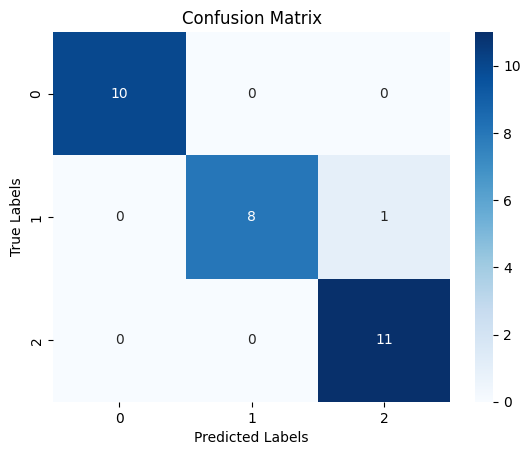

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plotting using seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import numpy as np

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], X_pred_encoded[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting a ROC curve for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


NameError: name 'X_pred_encoded' is not defined